# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 13: Simple Linear Regression. Estimation Theory continued: the Parametric bootstrap.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

## 1. Simple Linear Regression

In [4]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# - data
import numpy as np
import pandas as pd

# - os
import os

# - ml
import statsmodels.api as sm
import statsmodels.formula.api as smf


# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

# - parameters
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()
# - rng
rng = np.random.default_rng()
# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

We will use the `Fish.csv` data set in this session. You can grab it from [Kaggle: fish-market](https://www.kaggle.com/datasets/aungpyaeap/fish-market). Please place the `Fish.csv` data set into your `_data` directory.

In [5]:
# - loading the dataset
# - Kaggle: https://www.kaggle.com/datasets/aungpyaeap/fish-market
# - place it in your _data/ directory
fish_data = pd.read_csv(os.path.join(data_dir, 'Fish.csv'))
fish_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [6]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Target: predict Weight from Height

In [7]:
model_frame = fish_data[['Height', 'Weight']]
model_frame

,Height,Weight
0,11.5200,242.0
1,12.4800,290.0
2,12.3778,340.0
3,12.7300,363.0
4,12.4440,430.0
...,...,...
154,2.0904,12.2
155,2.4300,13.4
156,2.2770,12.2
157,2.8728,19.7


In [8]:
# - fitting the linear model to the data
linear_model = smf.ols(formula='Weight ~ Height', data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     173.3
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           3.84e-27
Time:                        12:05:38   Log-Likelihood:                -1101.0
No. Observations:                 159   AIC:                             2206.
Df Residuals:                     157   BIC:                             2212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -144.3860     45.663     -3.162      0.002    -234.579     -54.193
Height        60.4964      4.595     13.164      0.000      51.419      69.573
==============================================================================
Omnibus:                       95.711   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.586
Skew:                           2.288   Prob(JB):                    1.61e-105
Kurtosis:                      10.204   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear model has the form

$$y = \beta_1 x + \beta_0 + \varepsilon,$$

where
- $y$ - the true value of the *target variable*
- $\beta_1$ - the *slope* of the model
- $\beta_0$ - the *intercept* of the model
- $\varepsilon$ - the *residual*

The predicted value $\hat{y}$ of the target variable is computed via Liner regression via

$$\hat{y} = \beta_1 x + \beta_0.$$

In [9]:
# - model's parameters; Height represent the slope k
linear_model.params

Intercept   -144.385971
Height        60.496351
dtype: float64

In [10]:
# - predicting the value using model's formula and parameters
model_frame['Predicted Values'] = linear_model.predict()

In [11]:
# - calculating the residuals - the difference between the true and predicted values
model_frame['Residuals'] = linear_model.resid

In [12]:
model_frame

,Height,Weight,Predicted Values,Residuals
0,11.5200,242.0,552.531995,-310.531995
1,12.4800,290.0,610.608492,-320.608492
2,12.3778,340.0,604.425765,-264.425765
3,12.7300,363.0,625.732580,-262.732580
4,12.4440,430.0,608.430623,-178.430623
...,...,...,...,...
154,2.0904,12.2,-17.924399,30.124399
155,2.4300,13.4,2.620162,10.779838
156,2.2770,12.2,-6.635779,18.835779
157,2.8728,19.7,29.407947,-9.707947


In [13]:
# - some statistics on the residuals
model_frame['Residuals'].describe()

count    1.590000e+02
mean    -5.720092e-14
std      2.468036e+02
min     -3.572937e+02
25%     -1.165323e+02
50%     -7.076091e+01
75%      3.391263e+01
max      1.163621e+03
Name: Residuals, dtype: float64

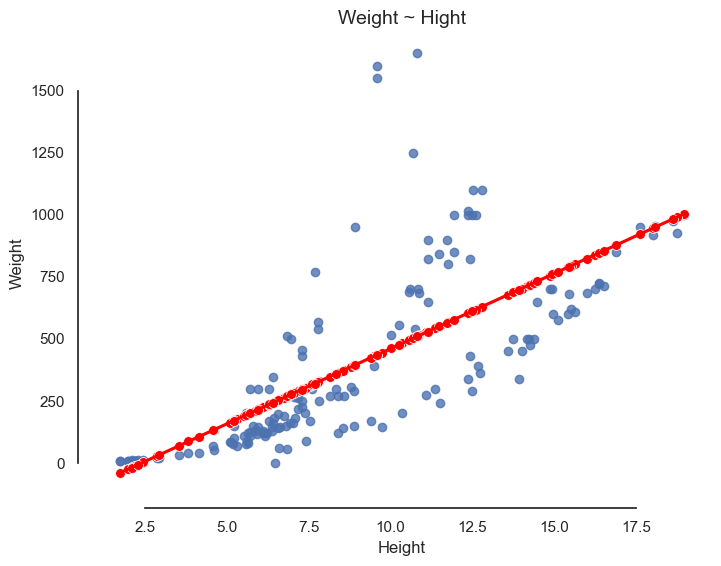

In [14]:
# - plotting the true data, predicted values and the prediction line
sns.regplot(data=model_frame, x='Height', y='Weight', ci=0, line_kws={'color':'red'})
sns.scatterplot(data=model_frame, x='Height', y='Predicted Values', color='red', s=50)
sns.despine(offset=10, trim=True)
plt.title('Weight ~ Hight', fontsize=14);

Ok, `statsmodels` can do it; how do we find out about the optimal values of $\beta_0$ and $\beta_1$?
Let's build ourselves a function that (a) tests for some particular values of $\beta_0$ and $\beta_1$ for a particular regression problem (i.e. for a particular dataset) and returns the model error.

The model error? Oh. Remember the residuals:

$$\epsilon_i = y_i - \hat{y_i}$$

where $y_i$ is the observation to be predicted, and $\hat{y_i}$ the actual prediction?

Next we do something similar to what happens in the computation of variance, square the differences:

$$\epsilon_i^2 = (y_i - \hat{y_i})^2$$

and define the model error for all observations to be **the sum of squares**:

$$SSE = \sum_{i=1}^{N}(y_i - \hat{y_i})^2$$

Obviously, the lower the $SSE$ - the Sum of Squared Error - the better the model! Here's a function that returns the SSE for a given data set (with two columns: the predictor and the criterion) and a choice of parameters $\beta_0$ and $\beta_1$:

In [15]:
# - sse function
def lg_sse(pars):
    # - pick up the parameters
    beta_0 = pars[0]
    beta_1 = pars[1]
    # - predict from parameters
    preds = beta_0+beta_1*fish_data['Height']
    # - compute residuals
    residuals = fish_data['Weight']-preds
    # - square the residuals
    residuals = residuals**2
    # - sum of squares
    residuals = residuals.sum()
    # - out:
    return residuals

Test `lg_sse()` now:

In [16]:
pars = [-144.385971, 60.496351]
print(lg_sse(pars))

9624100.07729549


Check via `statsmodels`:

In [17]:
(linear_model.resid**2).sum()

9624100.07729549

Method A. Random parameter space search

In [18]:
beta_0 = np.random.uniform(low=-200, high=200, size=10000)
beta_1 = np.random.uniform(low=-200, high=200, size=10000)
random_pars = pd.DataFrame({'beta_0':beta_0, 'beta_1':beta_1})
random_pars.head()

,beta_0,beta_1
0,-81.065799,-39.628705
1,-136.384245,-169.196308
2,-182.543686,-134.056794
3,46.472811,-123.622177
4,-174.587529,76.340414


In [19]:
sse = []
for i in range(random_pars.shape[0]):
    pars = [random_pars['beta_0'][i],random_pars['beta_1'][i]]
    sse.append(lg_sse(pars))
random_pars['sse'] = sse
random_pars.sort_values('sse', ascending=True, inplace=True)
random_pars.head()

,beta_0,beta_1,sse
8768,-157.707414,61.284868,9.632111e+06
8857,-127.539886,58.989659,9.632452e+06
2344,-135.440583,60.434230,9.635299e+06
4375,-140.709084,59.324736,9.635510e+06
8911,-170.296254,63.463265,9.649731e+06


Check with `statsmodels`:

In [20]:
linear_model.params

Intercept   -144.385971
Height        60.496351
dtype: float64

Not bad, how about 100,000 random pairs?

In [21]:
beta_0 = np.random.uniform(low=-200, high=200, size=100000)
beta_1 = np.random.uniform(low=-200, high=200, size=100000)
random_pars = pd.DataFrame({'beta_0':beta_0, 'beta_1':beta_1})
sse = []
for i in range(random_pars.shape[0]):
    pars = [random_pars['beta_0'][i],random_pars['beta_1'][i]]
    sse.append(lg_sse(pars))
random_pars['sse'] = sse
random_pars.sort_values('sse', ascending=True, inplace=True)
random_pars.head()

,beta_0,beta_1,sse
32529,-143.057241,60.234473,9.624465e+06
79439,-144.077625,60.654470,9.624647e+06
36946,-148.051122,60.949445,9.624721e+06
25624,-136.735857,59.826464,9.625831e+06
60144,-150.587654,60.817517,9.626153e+06


Method B. Grid search

In [22]:
beta_0_vals = np.linspace(-200,200,100)
beta_1_vals = np.linspace(-200,200,100)
grid = np.array([(beta_0, beta_1) for beta_0 in beta_0_vals for beta_1 in beta_1_vals])
grid = pd.DataFrame(grid)
grid = grid.rename(columns={0: "beta_0", 1: "beta_1"})
grid.head()

,beta_0,beta_1
0,-200.0,-200.000000
1,-200.0,-195.959596
2,-200.0,-191.919192
3,-200.0,-187.878788
4,-200.0,-183.838384


In [23]:
sse = []
for i in range(grid.shape[0]):
    pars = [grid['beta_0'][i],grid['beta_1'][i]]
    sse.append(lg_sse(pars))
grid['sse'] = sse
grid.sort_values('sse', ascending=True, inplace=True)
grid.head()

,beta_0,beta_1,sse
1864,-127.272727,58.585859,9.634695e+06
1964,-123.232323,58.585859,9.637258e+06
965,-163.636364,62.626263,9.637272e+06
1764,-131.313131,58.585859,9.637324e+06
1065,-159.595960,62.626263,9.639683e+06


A grid more dense:

In [24]:
beta_0_vals = np.linspace(-200,200,1000)
beta_1_vals = np.linspace(-200,200,1000)
grid = np.array([(beta_0, beta_1) for beta_0 in beta_0_vals for beta_1 in beta_1_vals])
grid = pd.DataFrame(grid)
grid = grid.rename(columns={0: "beta_0", 1: "beta_1"})
sse = []
for i in range(grid.shape[0]):
    pars = [grid['beta_0'][i],grid['beta_1'][i]]
    sse.append(lg_sse(pars))
grid['sse'] = sse
grid.sort_values('sse', ascending=True, inplace=True)
grid.head()

KeyboardInterrupt: 

Check with `statsmodels`:

In [ ]:
linear_model.params

Intercept   -144.385971
Height        60.496351
dtype: float64

Method C. Optimization (the real thing)

The Method of Least Squares

Here is the real thing. 

- **Question.** What do we really need to do to find the optimal $\beta_0$, $\beta_1$ parameters of the Simple Linear Regression Model?
- **Answer.** Of course, we need to find $\beta_0$, $\beta_1$ **at the minimum of the $SSE$ - the error - function.**

And how do we do that?

Well, in a particular case of a (Simple or Multiple) Linear Regression Model, it turns out that is possible to provide an analytical solution for all model parameteres that minimize the model $SSE$ (error) function. It takes some time work through the partial derivates of $SSE$ in respect to each model parameter, but it works in the end.

*But finding analytical solutuion will not work for just any statistical model.*

Now, imagine that we have an algorithm - call it an **optimization algorithm ** - that can find the parameters that minimize a respective function. Indeed we have such an algorithm. Indeed we have many different such algorithms, developed by experts in the very, very alive and complicated branch of mathematics called Optimization Theory. We will put one such algorithm - the famed Nelder-Mead Simplex Method - to work in order to minimize $SSE$ in respect to $\beta_0$, $\beta_1$.

In [ ]:
import scipy as sp

# - sse function
def lg_sse(pars, data):
    # - pick up the parameters
    beta_0 = pars[0]
    beta_1 = pars[1]
    # - predict from parameters
    preds = beta_0+beta_1*fish_data['Height']
    # - compute residuals
    residuals = fish_data['Weight']-preds
    # - square the residuals
    residuals = residuals**2
    # - sum of squares
    residuals = residuals.sum()
    # - out:
    return residuals

# - initial (random) parameter values
init_beta_0 = np.random.uniform(low=-15, high=15, size=1)
init_beta_1 = np.random.uniform(low=-15, high=15, size=1)
init_pars = [init_beta_0, init_beta_1]

# - optimize w. Nelder-Mead
optimal_model = sp.optimize.minimize(
    # - fun(parameters, args)
    fun=lg_sse,
    args = (fish_data), 
    x0 = init_pars, 
    method='Nelder-Mead')

# - optimal parameters
optimal_model.x

NameError: name 'fish_data' is not defined

Check against `statsmodels`

In [ ]:
linear_model.params

NameError: name 'linear_model' is not defined

Final value of the objective function (the model SSE, indeed):

In [ ]:
lg_sse(pars=optimal_model.x, data=fish_data)

9624100.07729553

Check against `statsmodels`

In [ ]:
linear_model.ssr

9624100.07729549

Error Surface Plot: The Objective Function

In [ ]:
beta_0_vals = np.linspace(-160,-120,200)
beta_1_vals = np.linspace(40,80,200)
grid = np.array([(beta_0, beta_1) for beta_0 in beta_0_vals for beta_1 in beta_1_vals])
grid = pd.DataFrame(grid)
grid = grid.rename(columns={0: "beta_0", 1: "beta_1"})
sse = []
for i in range(grid.shape[0]):
    pars = [grid['beta_0'][i],grid['beta_1'][i]]
    sse.append(lg_sse(pars, fish_data))
grid['sse'] = sse
grid.sort_values('sse', ascending=True, inplace=True)
grid.head()

,beta_0,beta_1,sse
15502,-144.522613,60.502513,9.624101e+06
15702,-144.321608,60.502513,9.624102e+06
15302,-144.723618,60.502513,9.624113e+06
15902,-144.120603,60.502513,9.624117e+06
15102,-144.924623,60.502513,9.624137e+06


This the function that we have minimized:

In [ ]:
# - import plotly
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# - Mesh3d: Objective Function
fig = go.Figure(data=[go.Mesh3d(
    x=grid['beta_0'], 
    y=grid['beta_1'], 
    z=grid['sse'], 
    color='lightblue', 
    opacity=0.50)])
fig.update_layout(scene = dict(
                    xaxis_title='Beta_0',
                    yaxis_title='Beta_1',
                    zaxis_title='SSE'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

NameError: name 'grid' is not defined

Back to statsmodels

In [ ]:
# - Pearson's correlation (R-value) coefficient and R^2
print(f"Pearson's correlation (R-value): {round(np.sqrt(linear_model.rsquared), 4)}")
print(f"Coefficient of determination (R^2): {round(linear_model.rsquared, 4)}")

Pearson's correlation (R-value): 0.7243
Coefficient of determination (R^2): 0.5247


In [ ]:
# - p-values of the model's parameters
print(f"p-values: \n{linear_model.pvalues}")

p-values: 
Intercept    1.881076e-03
Height       3.842342e-27
dtype: float64


In [ ]:
# --- Predicting new data

predictions = pd.DataFrame(columns=['Height', 'Weight'])

# - sampling the new data from the normal distribution with the mean and std parameters taken from the original data
new_fish_height = rng.normal(loc=model_frame['Height'].mean(), scale=model_frame['Height'].std(), size=100)
# - clipping the negative values 
new_fish_height = np.clip(new_fish_height, a_min=0, a_max=np.infty)
predictions['Height'] = new_fish_height

# - predicting the heights on the new data using the linear model
new_fish_weight = linear_model.predict(predictions['Height'])

# - displaying the new data and the corresponding predictions
predictions['Weight'] = new_fish_weight
print(predictions)

       Height      Weight
0    8.484527  368.896952
1    8.725205  383.457092
2   13.546180  675.108481
3   13.488963  671.647064
4    7.094777  284.822166
..        ...         ...
95   1.687698  -42.286421
96   6.775176  265.487455
97  12.524558  613.304086
98  17.830019  934.265111
99   5.936481  214.749475

[100 rows x 2 columns]


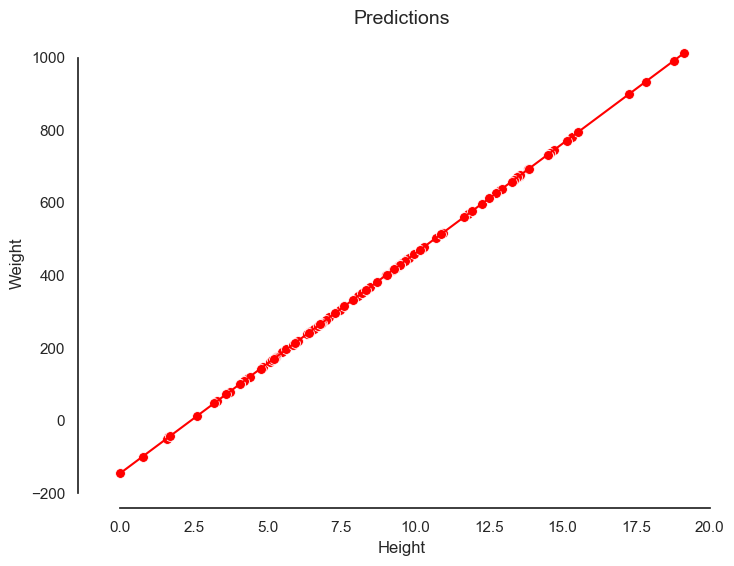

In [ ]:
# - plotting the predictions
sns.lineplot(data=predictions, x='Height', y='Weight', color='red')
sns.scatterplot(data=predictions, x='Height', y='Weight', color='red', s=50)
sns.despine(offset=10, trim=True)
plt.title('Predictions', fontsize=14);

In [ ]:
# R^2 upacked - calculating R^2 using the corresponding formulas
total_sse = np.sum((model_frame['Weight'] - model_frame['Weight'].mean())**2)
model_sse = np.sum((model_frame['Predicted Values'] - model_frame['Weight'].mean())**2)
residual_sse = np.sum(model_frame['Residuals']**2)

print(np.isclose(total_sse, model_sse + residual_sse))

True


In [ ]:
# - calculating R^2 from the correlation 
r2 = model_frame['Height'].corr(model_frame['Weight'])**2
print(f"r2 = {r2}\n")

# - or 
corr_matrix = np.corrcoef(model_frame['Height'], model_frame['Weight'])**2
print(corr_matrix, '\n')
r2 = corr_matrix[0, 1]
print(f"r2 = {r2}")

r2 = 0.5246761559328881

[[1.         0.52467616]
 [0.52467616 1.        ]] 

r2 = 0.5246761559328881


In [ ]:
# - yet another way to calculate R^2
model_sse/total_sse

0.5246761559328881

In [ ]:
# - correlation is the covariance of the scaled variables!

# - scaling the variables
x = (model_frame['Height'] - model_frame['Height'].mean())/model_frame['Height'].std()
y = (model_frame['Weight'] - model_frame['Weight'].mean())/model_frame['Weight'].std()

# - calculating the covariance
cov_matrix = np.cov(x, y)
cov = cov_matrix[0, 1]
print('cov.: ', cov)
print('R^2 = cov.^2: ', cov**2)

cov.:  0.7243453291993318
R^2 = cov.^2:  0.5246761559328884


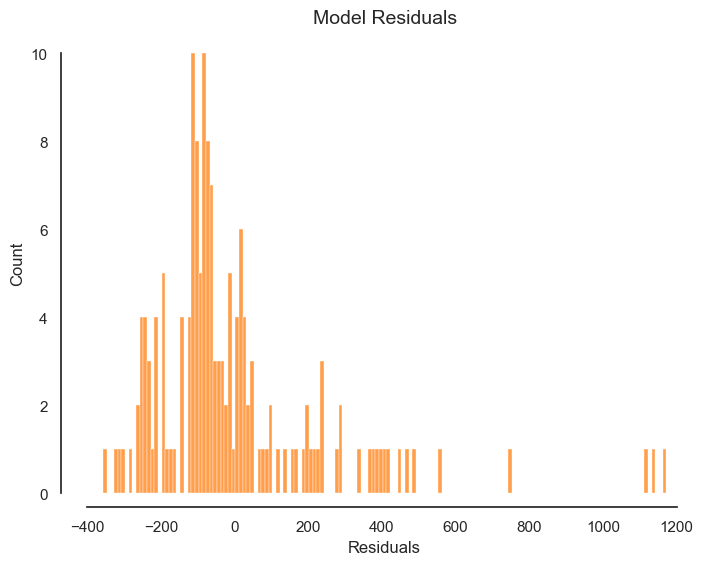

In [ ]:
# - plotting the distribution of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(data=model_frame, x='Residuals', binwidth=10, color='tab:orange')
sns.despine(offset=10, trim=True)
plt.title('Model Residuals', fontsize=14);

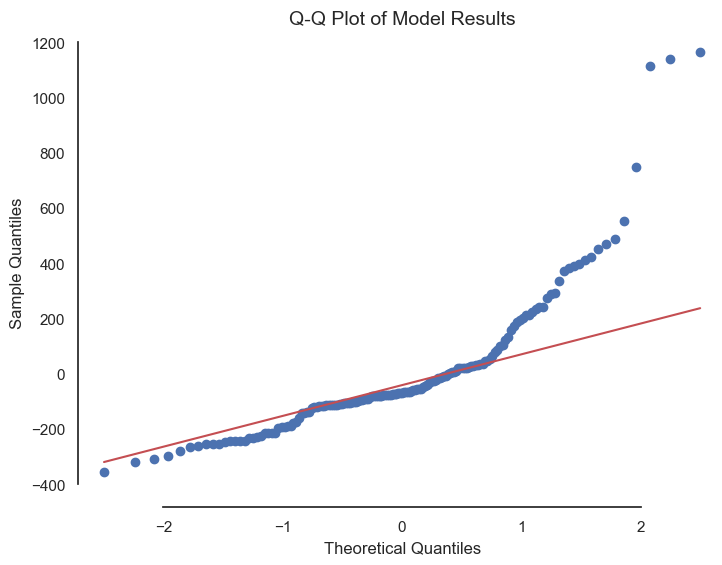

In [ ]:
# - plotting the qqplot
sm.qqplot(model_frame['Residuals'].values, line='q')
sns.despine(offset=10, trim=True)
plt.title('Q-Q Plot of Model Results', fontsize=14);

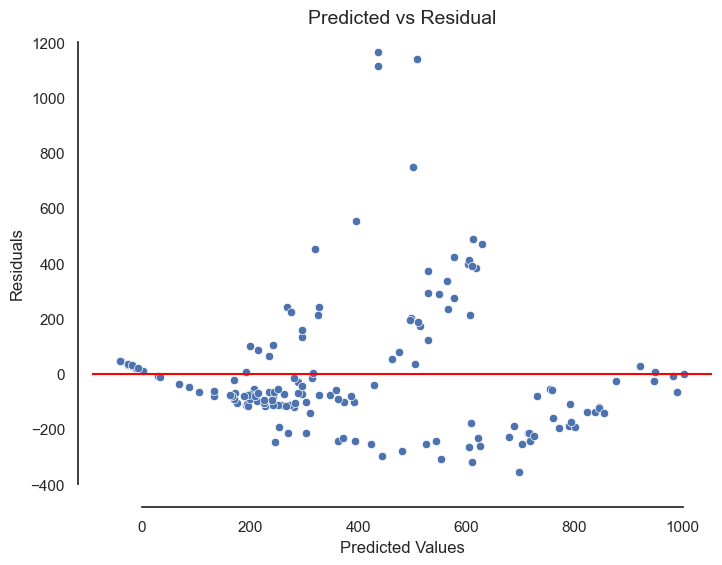

In [ ]:
### --- Heteroskedacity

# - plotting the predicted values vs the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(data=model_frame, x='Predicted Values', y='Residuals')
sns.despine(offset=10, trim=True)
plt.axhline(y=0, color='red')
plt.title('Predicted vs Residual', fontsize=14);

In [ ]:
# - identifying the influental cases
model_inf = linear_model.get_influence()
inf_frame = model_inf.summary_frame()
inf_frame

,dfb_Intercept,dfb_Height,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.010916,-0.059963,0.006823,-1.259609,0.008528,-0.116819,-1.261984,-0.117039
1,0.032398,-0.085427,0.009019,-1.301798,0.010531,-0.134302,-1.304707,-0.134602
2,0.024818,-0.068269,0.005990,-1.073542,0.010288,-0.109452,-1.074067,-0.109506
3,0.031016,-0.074907,0.006424,-1.067137,0.011157,-0.113353,-1.067612,-0.113404
4,0.017523,-0.046875,0.002770,-0.724468,0.010445,-0.074430,-0.723367,-0.074317
...,...,...,...,...,...,...,...,...
154,0.018540,-0.015848,0.000175,0.123070,0.022599,0.018714,0.122683,0.018655
155,0.006371,-0.005382,0.000021,0.044004,0.021029,0.006449,0.043864,0.006429
156,0.011339,-0.009632,0.000066,0.076917,0.021726,0.011463,0.076673,0.011426
157,-0.005431,0.004510,0.000015,-0.039590,0.019101,-0.005525,-0.039464,-0.005507


In [ ]:
### --- Influence Measures

# - calculating the Cook's distance /Cook and Weisberg (1982)/
# - consider values with Cook's distance greater than 1 to be problematic

w_cookD = np.argwhere(model_inf.cooks_distance[0] > 1)
w_cookD

array([], shape=(0, 1), dtype=int64)

In [ ]:
# - Leverage: hat values
# - Average Leverage = (k+1)/n
# - k - num. of predictors
# - n - num. observations
# - Also termed: hat values, range: 0 - 1
# - Various criteria (twice the average leverage, three times the average leverage...)

k = 1
n = len(model_frame)
w_leverage = np.argwhere(model_inf.hat_matrix_diag > 2*(k+1)/n)
w_leverage

array([[27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34]])

In [ ]:
# - influence plot
inf_plot_frame = pd.DataFrame(columns=['Residuals', 'Leverage', 'Cook Dist.'])

inf_plot_frame['Residuals'] = model_frame['Residuals']
inf_plot_frame['Leverage'] = model_inf.hat_matrix_diag
inf_plot_frame['Cook Dist.'] = model_inf.cooks_distance[0]

inf_plot_frame

,Residuals,Leverage,Cook Dist.
0,-310.531995,0.008528,0.006823
1,-320.608492,0.010531,0.009019
2,-264.425765,0.010288,0.005990
3,-262.732580,0.011157,0.006424
4,-178.430623,0.010445,0.002770
...,...,...,...
154,30.124399,0.022599,0.000175
155,10.779838,0.021029,0.000021
156,18.835779,0.021726,0.000066
157,-9.707947,0.019101,0.000015


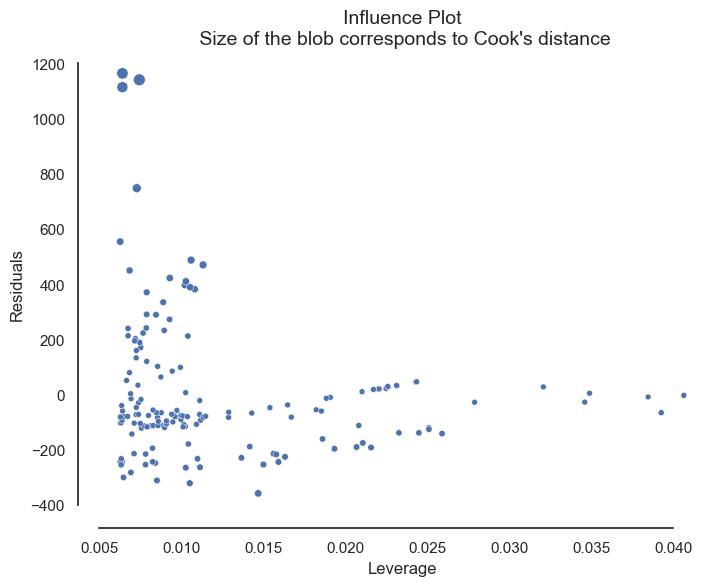

In [ ]:
# - plotting the influence plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=inf_plot_frame, x='Leverage', y='Residuals', size='Cook Dist.', legend=None)
sns.despine(offset=10, trim=True)
plt.title("Influence Plot\n Size of the blob corresponds to Cook's distance", fontsize=14);

## Linear Regression using scikit-learn

In [ ]:
# - import scikit-learn
from sklearn.linear_model import LinearRegression

In [ ]:
# - fitting the linear model to the data
X = model_frame['Height'].values.reshape(-1, 1)
y = model_frame['Weight'].values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# - coefficents of the model
lin_reg.coef_, lin_reg.intercept_

(array([[60.49635121]]), array([-144.38597115]))

In [ ]:
# - calculating R^2 
lin_reg.score(X, y)

0.5246761559328882

In [ ]:
# - predicting the weight using the model
X_pred = predictions['Height'].values.reshape(-1, 1)
y_pred = lin_reg.predict(X_pred)
y_pred[:10]

array([[368.89695206],
       [383.45709212],
       [675.1084809 ],
       [671.64706435],
       [284.82216593],
       [745.83703025],
       [518.50581109],
       [676.12659725],
       [737.07665961],
       [243.70903387]])

In [ ]:
# - comparing with the predictions from scipy's model
predictions['Weight']

0     368.896952
1     383.457092
2     675.108481
3     671.647064
4     284.822166
         ...    
95    -42.286421
96    265.487455
97    613.304086
98    934.265111
99    214.749475
Name: Weight, Length: 100, dtype: float64

## 2. Parametric Bootstrap

### Bias and Variance via the Bootstrap

We will now begin working with **resampling methods** in statistics. 

The first resampling method that we will consider is the **Parametric Bootstrap**. It is *magic*, belive me.

Do you remember from our previous discussions of Estimation Theory what a *Bias and Variance* of a statistical estimator are?

Is there a method to estimate the Bias of a statistical estimator, at all? For example: what are the biases of $\beta_0$, $\beta_1$ in our Simple Linear Regression model?

First: the model parameters and their standard errors

In [ ]:
# Get the estimated parameters and standard errors of the model
params = linear_model.params.values
stderr = linear_model.bse.values

# Print the results
print(f"Beta 0: {params[0]} (SE = {stderr[0]})")
print(f"Beta 1: {params[1]} (SE = {stderr[1]})")

Beta 0: -144.38597115478754 (SE = 45.66290399900891)
Beta 1: 60.49635121272138 (SE = 4.595454722325197)


Second: the standard deviation of model residuals

In [ ]:
error_residual = np.std(linear_model.resid, ddof=1)
error_residual

246.80361789420277

Third: the Sim-Fit Loop, Parametric Bootstrap

In [ ]:
# import normal distribution from scipy
from scipy.stats import norm

# Predicted values
model_predictions = linear_model.predict()

# Define the number of bootstrap samples
n_samples = 100000

# Initialize empty arrays to store bootstrap estimates of coefficients
beta_0_samples = np.zeros(n_samples)
beta_1_samples = np.zeros(n_samples)

# Loop over the number of samples
for i in range(n_samples):

    # Use our already established model to produce new data sampless:
    # enter error_residual to model predictions 
    boostrap_predictions = model_predictions + norm.rvs(loc = 0, 
                                                        scale= error_residual, 
                                                        size = model_predictions.size)
    resampled_data = pd.DataFrame({'Height': fish_data['Height'],
                                   'Weight': boostrap_predictions})
    
    # Fit the model to the boostrap_predictions
    model_resampled = smf.ols(formula='Weight ~ Height', data=resampled_data).fit()
    
    # Store the coefficients from the resampled data
    beta_0_samples[i] = model_resampled.params.Intercept
    beta_1_samples[i] = model_resampled.params.Height

# Calculate the bias and variance of the coefficients
beta_0_bias = np.mean(beta_0_samples) - linear_model.params.Intercept
beta_1_bias = np.mean(beta_1_samples) - linear_model.params.Height
beta_0_var = np.var(beta_0_samples)
beta_1_var = np.var(beta_1_samples)

# Print the results
print(f"Beta 0: bias = {beta_0_bias}, variance = {beta_0_var}")
print(f"Beta 1: bias = {beta_1_bias}, variance = {beta_1_var}")

Beta 0: bias = -0.22439385917476784, variance = 2082.998577709944
Beta 1: bias = 0.018004275971428285, variance = 20.98680643793236


Compare with model parameter variances as estimated from the original Linear Regression

In [ ]:
# Print the results
print(f"Beta 0: variance = {stderr[0]**2}")
print(f"Beta 1: variance = {stderr[1]**2}")

Beta 0: variance = 2085.100801622704
Beta 1: variance = 21.118204104940954


$$\hat{Bias}_{boot} = \frac{1}{B} \sum_{r=1}^B \hat{\theta}^{*(r)} - \hat{\theta},$$

where $\hat{\theta}$ is the original estimator, $\hat{\theta}^{*(r)}$ is the estimate of $\hat{\theta}$ based on the $r$ bootstrap sample, and $B$ is the number of bootstrap samples.

Or, in a purely theoretical way, assuming that the full distribution of all possible bootstramp samples could ever be known:

$$Bias_{boot} = E_{\mathcal{F}^*}[\hat{\theta}^{*}] - \hat{\theta},$$

where $\hat{\theta}$ is the original estimator, $\hat{\theta}^{*}$ is the estimate of $\hat{\theta}$ based on a single bootstrap sample, and $E_{\mathcal{F}^*}$ denotes the expected value with respect to the distribution of bootstrap samples $\mathcal{F}^*$.

In this formula, the absence of a hat symbol above $Bias_{boot}$ indicates that this is the true bias, rather than an estimate of the bias.

### Further Reading

- [Real Python: Linear Regression in Python](https://realpython.com/linear-regression-in-python/)
- [Khan Academy: Exploring bivariate numerical data](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data)
- [Khan Academy: Advanced regression (inference and transforming)](https://www.khanacademy.org/math/statistics-probability/advanced-regression-inference-transforming)
- [Khan Academy: Statistical Inference](https://www.youtube.com/playlist?list=PLgJhDSE2ZLxaaM1W45NB8dFSQ-frJJoBq)

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>